# This project uses Brazilian E-commerce public data

In [75]:
#This cell is for importing necessary libraries and files

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
import seaborn as sns

folder_path = '../ecommerce-data-analysis/Brazilian E-Commerce Public Dataset/'

import warnings
warnings.filterwarnings("ignore")


# Load each CSV file into a DataFrame
customers = pd.read_csv(folder_path + 'olist_customers_dataset.csv')
orders = pd.read_csv(folder_path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(folder_path + 'olist_order_items_dataset.csv')
products = pd.read_csv(folder_path + 'olist_products_dataset.csv')
payments = pd.read_csv(folder_path + 'olist_order_payments_dataset.csv')


## The following cells to confirm if the data files were properly imported

In [76]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [77]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [78]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [79]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [80]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### All files were property imported

### Data merge comp

In [81]:
#This function is to determine common attribute between two data set.
def check_common_attribute(dataset_one, dataset_two):
    common_columns_customers_orders = set(dataset_one.columns).intersection(set(dataset_two.columns))
    print("Common columns between 'customers' and 'orders':", common_columns_customers_orders)
    return common_columns_customers_orders
    

In [82]:
# To check the common attribute between customers and order data set
check_common_attribute(customers, orders)

Common columns between 'customers' and 'orders': {'customer_id'}


{'customer_id'}

In [83]:
# The common attribute is customer_id between orders and customers. Hence, merge the dataset with the field customer_id
orders_with_customer_id = pd.merge(orders, customers, on='customer_id')

In [84]:
# To check the common attribute between orders_with_customers and order data set
check_common_attribute(orders_with_customer_id, order_items)

Common columns between 'customers' and 'orders': {'order_id'}


{'order_id'}

In [85]:
# The common attribute is customer_id between orders_with_customer_id and order_items. Hence, merge the dataset with the field order_id
orders_complete = pd.merge(orders_with_customer_id, order_items, on='order_id')

In [86]:
# To check the common attribute between orders_complete and products data set
check_common_attribute(orders_complete, products)

Common columns between 'customers' and 'orders': {'product_id'}


{'product_id'}

In [87]:
# The common attribute is customer_id between orders_complete and products. Hence, merge the dataset with the field customer_id
orders_complete_with_product_id = pd.merge(orders_complete, products, on='product_id')

In [88]:
# To check the common attribute between orders_complete_with_product_id and payments data set
check_common_attribute(orders_complete_with_product_id, payments)

Common columns between 'customers' and 'orders': {'order_id'}


{'order_id'}

In [89]:
# The common attribute is customer_id between cusomters and order. Hence, merge the dataset with the field customer_id
orders_final = pd.merge(orders_complete_with_product_id, payments, on='order_id')

In [90]:
# TO learn about all attributes of data frame
orders_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  order_item_id                 

In [91]:
# To understand the missing data from the data frame
orders_final.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
payment_sequ

In [92]:
# Dropping rows with missing values
# Since there are 11 fields that contains null value.
# I would like to drop tuples those have more than 10 missing field.

orders_final_na_removed = orders_final.dropna(thresh=11)

In [93]:
# Check how many rows were removed from the original data
orders_final_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  order_item_id                 

In [94]:
#Since the dataset contains attributes in the form of dates,
#I want to ensure I am converting those values into the correct datetime objects.
date_columns = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date', 'shipping_limit_date'
]
# Create a copy of the DataFrame to avoid the warning
orders_final_na_removed = orders_final_na_removed.copy()


for col in date_columns:
    orders_final_na_removed[col] = pd.to_datetime(orders_final_na_removed[col], errors='coerce')




In [95]:
orders_final_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_approved_at              117586 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 6   order_delivered_customer_date  115034 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117601 non-null  datetime64[ns]
 8   customer_unique_id             117601 non-null  object        
 9   customer_zip_code_prefix       117601 non-null  int64         
 10  customer_city                  117601 non-null  object        
 11  

In [96]:
#Correct misspelled attributes to improve readability

orders_final_na_removed = orders_final_na_removed.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})

In [97]:
# copy over the final data into new variable name cleaned_df
cleaned_df = orders_final_na_removed.copy()

In [98]:
# Check basic statistics on simple attributes
basic_stats = cleaned_df[['price', 'payment_value']].describe().round(2)


In [99]:
basic_stats

,price,payment_value
count,117601.00,117601.00
mean,120.82,172.69
std,184.48,267.59
min,0.85,0.00
25%,39.90,60.87
50%,74.90,108.21
75%,134.90,189.26
max,6735.00,13664.08


In [100]:
# Clean new dataframe to perform additional analysis.
payment_type_counts = cleaned_df['payment_type'].value_counts()
product_category_counts = cleaned_df['product_category_name'].value_counts()
order_status_counts = cleaned_df['order_status'].value_counts()

### Localization of the data set.
#### Since the language of the dataset is not based on English, I would like to perform a localization of the dataset
#### However, it will be only done in the data that is more relevant to maximize the benefit of time usage.

In [101]:
# Check Top 35 category for localization
product_category_counts = cleaned_df['product_category_name'].value_counts()
pd.set_option('display.max_rows', None)

In [102]:
# Based on rough checking, it all data that is less than 500 seems to be less relevant. 
# Hence, we will only perform that has more than 500 counts
product_category_counts

product_category_name
cama_mesa_banho                                   11823
beleza_saude                                       9972
esporte_lazer                                      8945
moveis_decoracao                                   8744
informatica_acessorios                             8082
utilidades_domesticas                              7355
relogios_presentes                                 6201
telefonia                                          4721
ferramentas_jardim                                 4574
automotivo                                         4379
brinquedos                                         4273
cool_stuff                                         3987
perfumaria                                         3560
bebes                                              3196
eletronicos                                        2845
papelaria                                          2617
fashion_bolsas_e_acessorios                        2151
pet_shop                  

In [62]:
# Anything below 500 is considered less material. Hence, we will filter those that have more than 700 counts
product_category_counts_filtered = product_category_counts[product_category_counts>700]

In [63]:
print(product_category_counts_filtered.count())

25


In [105]:
#Translate top 25 category
category_mapping = {
    'cama_mesa_banho': 'bed_bath_table',
    'beleza_saude': 'beauty_health',
    'esporte_lazer': 'sports_leisure',
    'moveis_decoracao': 'furniture_decor',
    'informatica_acessorios': 'computers_accessories',
    'brinquedos': 'toys',
    'automotivo': 'automotive',
    'relogios_presentes': 'watches_gifts',
    'telefonia': 'telephony',
    'bebes': 'baby',
    'utilidades_domesticas': 'home_utilities',
    'malas_acessorios': 'luggage_accessories',
    'perfumaria': 'perfumery',
    'alimentos_bebidas': 'food_beverages',
    'bebidas': 'beverages',
    'construcao_ferramentas_construcao': 'construction_tools',
    'cool_stuff': 'cool_stuff',
    'consoles_games': 'consoles_games',
    'moveis_escritorio': 'office_furniture',
    'construcao_ferramentas_ferramentas': 'tools',
    'fashion_calcados': 'fashion_shoes',
    'telefonia_fixa': 'landline_phones',
    'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
    'papelaria': 'stationery',
    'eletrodomesticos': 'home_appliances',
}

cleaned_df['product_category_name'] = cleaned_df['product_category_name'].map(category_mapping).fillna(cleaned_df['product_category_name'])

product_category_counts = cleaned_df['product_category_name'].value_counts()
print(product_category_counts.head(25))


product_category_name
bed_bath_table              11823
beauty_health                9972
sports_leisure               8945
furniture_decor              8744
computers_accessories        8082
home_utilities               7355
watches_gifts                6201
telephony                    4721
ferramentas_jardim           4574
automotive                   4379
toys                         4273
cool_stuff                   3987
perfumery                    3560
baby                         3196
eletronicos                  2845
stationery                   2617
fashion_bags_accessories     2151
pet_shop                     2028
office_furniture             1778
consoles_games               1191
luggage_accessories          1163
construction_tools            951
home_appliances               788
instrumentos_musicais         718
eletroportateis               701
Name: count, dtype: int64


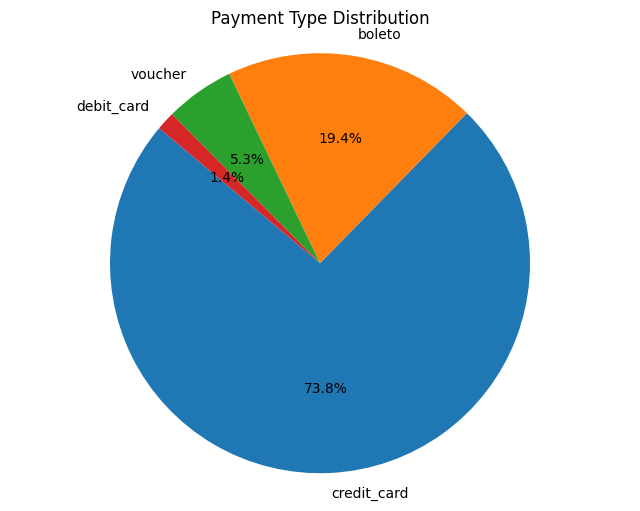

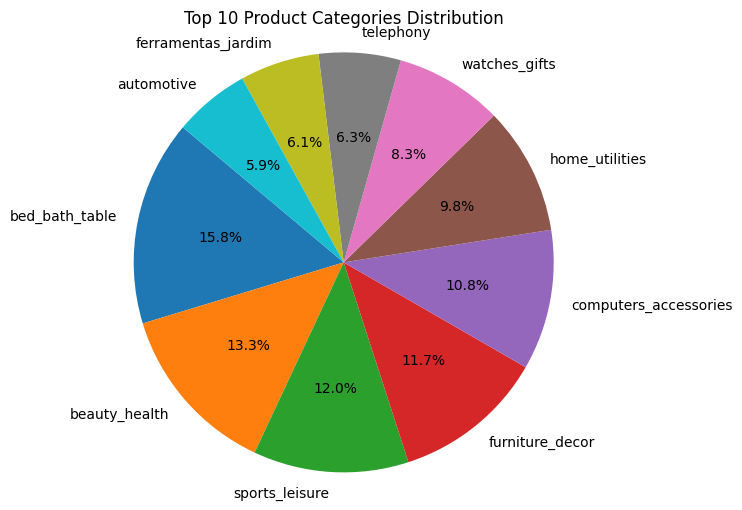

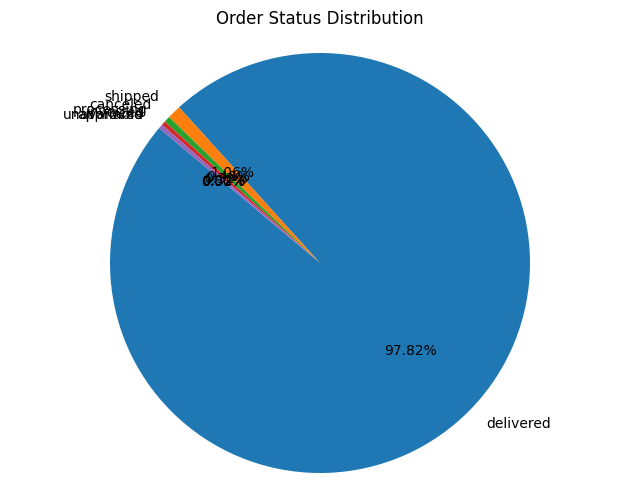

In [106]:
import matplotlib.pyplot as plt

# This part is to create pie charts on important 

# Pie chart for payment types
plt.figure(figsize=(8, 6))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Pie chart for product categories (limiting to top 10 categories for readability)
top_10_product_category_counts = product_category_counts.nlargest(10)

plt.figure(figsize=(8, 6))
plt.pie(top_10_product_category_counts, labels=top_10_product_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Order Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [107]:
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

# Calculate the date of the most recent order in the dataset
max_order_date = cleaned_df['order_purchase_timestamp'].max()

# Grouping by customer to calculate RFM metrics
rfm_df = cleaned_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_order_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

# Rename the columns for better clarity
rfm_df.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

# Display the resulting RFM table
print(rfm_df.head(10))

                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     27.19
2  0000f46a3911fa3c0805444483337064      541          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      292          1    196.89
5  0004bd2a26a76fe21f786e4fbd80607f      150          1    166.98
6  00050ab1314c0e55a6ca13cf7181fecf      135          1     35.38
7  00053a61a98854899e70ed204dd4bafe      186          2    838.36
8  0005e1862207bf6ccc02e4228effd9a0      547          1    150.12
9  0005ef4cd20d2893f0d9fbd94d3c0d97      174          1    129.76


In [108]:
# Define quantiles for RFM scoring
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.2, 0.4, 0.6, 0.8])


# Scoring function for Recency, Frequency, and Monetary
def rfm_score(x, metric, quantiles):
    if x <= quantiles[metric][0.2]:
        return 5
    elif x <= quantiles[metric][0.4]:
        return 4
    elif x <= quantiles[metric][0.6]:
        return 3
    elif x <= quantiles[metric][0.8]:
        return 2
    else:
        return 1

# Apply scoring
rfm_df['R_Score'] = rfm_df['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# Combine RFM scores to create a composite score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
print(rfm_df.head(10))


                 customer_unique_id  Recency  Frequency  Monetary  R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    141.90        4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     27.19        4   
2  0000f46a3911fa3c0805444483337064      541          1     86.22        1   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     43.62        2   
4  0004aac84e0df4da2b147fca70cf8255      292          1    196.89        2   
5  0004bd2a26a76fe21f786e4fbd80607f      150          1    166.98        4   
6  00050ab1314c0e55a6ca13cf7181fecf      135          1     35.38        4   
7  00053a61a98854899e70ed204dd4bafe      186          2    838.36        3   
8  0005e1862207bf6ccc02e4228effd9a0      547          1    150.12        1   
9  0005ef4cd20d2893f0d9fbd94d3c0d97      174          1    129.76        4   

   F_Score  M_Score RFM_Score  
0        5        2       452  
1        5        5       455  
2        5        4       154  
3        5   

In [109]:
# Sorting by Frequency and Monetary scores first, then Recency (descending order of value)
top_customers = rfm_df.sort_values(by=['F_Score', 'M_Score', 'R_Score'], ascending=[False, False, False])

# Display the top 10 valuable customers
print(top_customers.head(10))


                   customer_unique_id  Recency  Frequency  Monetary  R_Score  \
20   000ec5bff359e1c0ad76a81a45cb598f       12          1     27.75        5   
37   00196c4c9a3af7dd2ad10eade69c926f       36          1     37.58        5   
113  0045e9ad4d6c85d2323a7ab374b76183       75          1     24.13        5   
117  0048a779a98a7848514096ff04046079       25          1     41.04        5   
121  0049ec2d7a5818d0e4b3f4735cec2458       46          1     44.18        5   
161  0065f7795a38381973a373c8b4939679       57          1     31.22        5   
175  00705dcbc0b9cad67abd658612770905       23          1     47.93        5   
240  00a089b8c7ab1e3808c3ad7de7a254dd       75          1     42.47        5   
269  00b246520d4904724f9b20188a2ff39b       92          1     35.05        5   
308  00cc0061269a99836cf8b029b1d0177d       34          1     41.64        5   

     F_Score  M_Score RFM_Score  
20         5        5       555  
37         5        5       555  
113        5     

In [110]:
# Prioritize Recency, then Frequency, then Monetary
recent_high_spenders = rfm_df.sort_values(by=['R_Score', 'F_Score', 'M_Score'], ascending=[False, False, False])

# Display the top 10 recent high-spenders
print(recent_high_spenders.head(10))


                   customer_unique_id  Recency  Frequency  Monetary  R_Score  \
20   000ec5bff359e1c0ad76a81a45cb598f       12          1     27.75        5   
37   00196c4c9a3af7dd2ad10eade69c926f       36          1     37.58        5   
113  0045e9ad4d6c85d2323a7ab374b76183       75          1     24.13        5   
117  0048a779a98a7848514096ff04046079       25          1     41.04        5   
121  0049ec2d7a5818d0e4b3f4735cec2458       46          1     44.18        5   
161  0065f7795a38381973a373c8b4939679       57          1     31.22        5   
175  00705dcbc0b9cad67abd658612770905       23          1     47.93        5   
240  00a089b8c7ab1e3808c3ad7de7a254dd       75          1     42.47        5   
269  00b246520d4904724f9b20188a2ff39b       92          1     35.05        5   
308  00cc0061269a99836cf8b029b1d0177d       34          1     41.64        5   

     F_Score  M_Score RFM_Score  
20         5        5       555  
37         5        5       555  
113        5     

In [111]:
#Both seems to be the same list of customer.
print(top_customers.head(10)['customer_unique_id'])
print(recent_high_spenders.head(10)['customer_unique_id'])

20     000ec5bff359e1c0ad76a81a45cb598f
37     00196c4c9a3af7dd2ad10eade69c926f
113    0045e9ad4d6c85d2323a7ab374b76183
117    0048a779a98a7848514096ff04046079
121    0049ec2d7a5818d0e4b3f4735cec2458
161    0065f7795a38381973a373c8b4939679
175    00705dcbc0b9cad67abd658612770905
240    00a089b8c7ab1e3808c3ad7de7a254dd
269    00b246520d4904724f9b20188a2ff39b
308    00cc0061269a99836cf8b029b1d0177d
Name: customer_unique_id, dtype: object
20     000ec5bff359e1c0ad76a81a45cb598f
37     00196c4c9a3af7dd2ad10eade69c926f
113    0045e9ad4d6c85d2323a7ab374b76183
117    0048a779a98a7848514096ff04046079
121    0049ec2d7a5818d0e4b3f4735cec2458
161    0065f7795a38381973a373c8b4939679
175    00705dcbc0b9cad67abd658612770905
240    00a089b8c7ab1e3808c3ad7de7a254dd
269    00b246520d4904724f9b20188a2ff39b
308    00cc0061269a99836cf8b029b1d0177d
Name: customer_unique_id, dtype: object


In [112]:
# Both top customer and recent high spender 
comparison_result = top_customers.head(10)['customer_unique_id'] == recent_high_spenders.head(10)['customer_unique_id']

In [113]:
# To confirm if the top customer and recent high spenders have same customer id.
print(comparison_result)

20     True
37     True
113    True
117    True
121    True
161    True
175    True
240    True
269    True
308    True
Name: customer_unique_id, dtype: bool


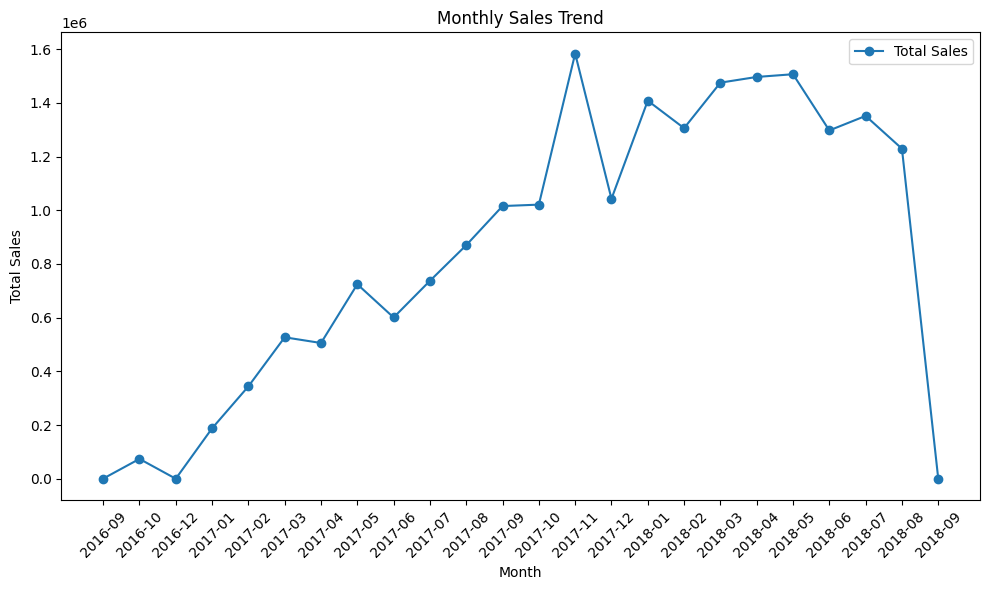

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert order_purchase_timestamp to datetime (if not already converted)
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

# Create new columns for both month and week
cleaned_df['order_month'] = cleaned_df['order_purchase_timestamp'].dt.to_period('M')
cleaned_df['order_week'] = cleaned_df['order_purchase_timestamp'].dt.to_period('W')

# Aggregating sales by month
monthly_sales = cleaned_df.groupby('order_month').agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Aggregating sales by week
weekly_sales = cleaned_df.groupby('order_week').agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['order_month'].astype(str), monthly_sales['payment_value'], marker='o', label='Total Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


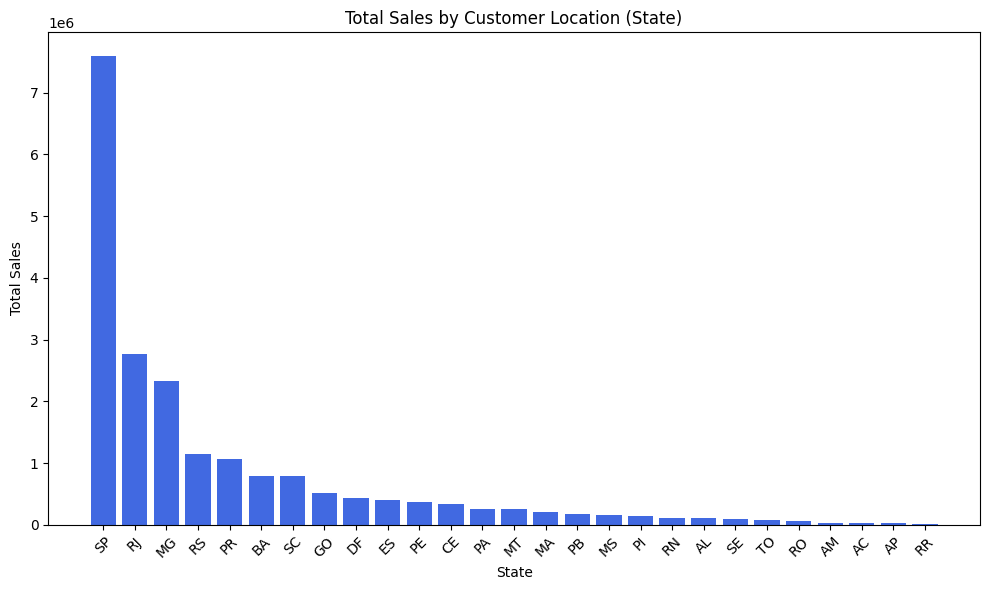

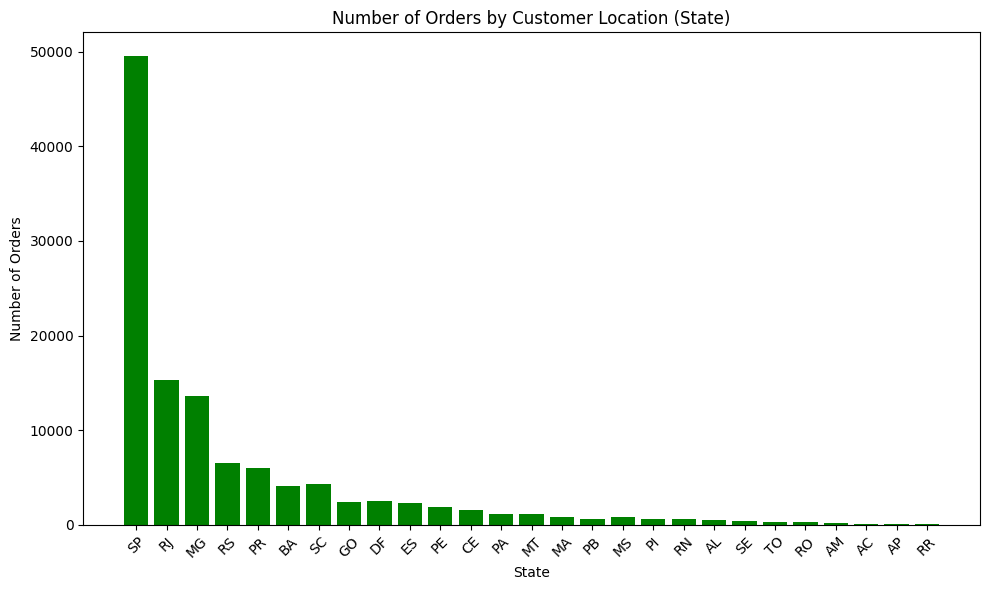

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregating sales and order data by customer state
location_sales = cleaned_df.groupby('customer_state').agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Sorting the data by total sales for better visualization
location_sales = location_sales.sort_values(by='payment_value', ascending=False)

# Plotting the total sales by customer state
plt.figure(figsize=(10, 6))
plt.bar(location_sales['customer_state'], location_sales['payment_value'], color='royalblue')
plt.title('Total Sales by Customer Location (State)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the number of orders by customer state
plt.figure(figsize=(10, 6))
plt.bar(location_sales['customer_state'], location_sales['order_id'], color='green')
plt.title('Number of Orders by Customer Location (State)')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


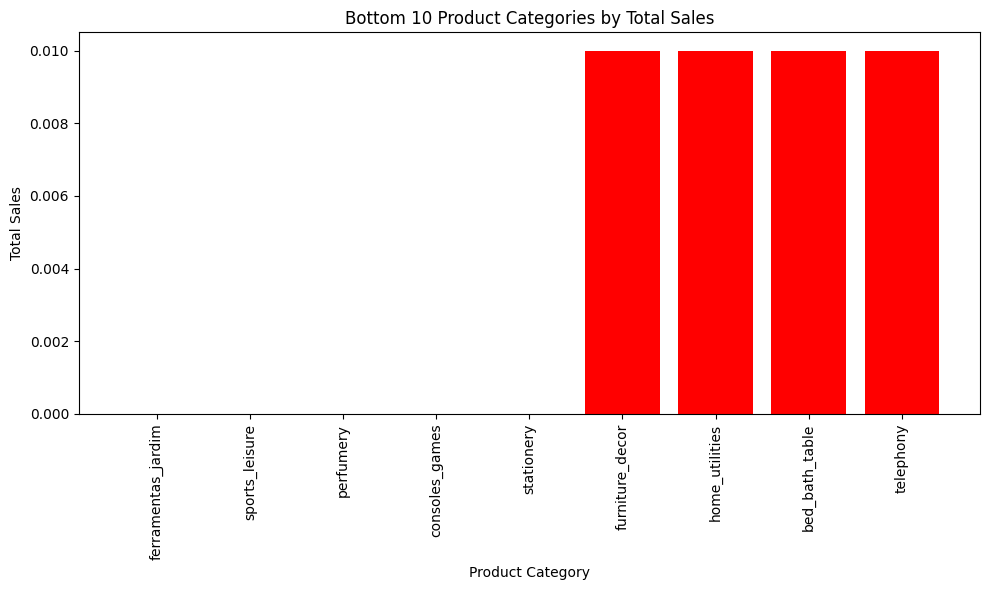

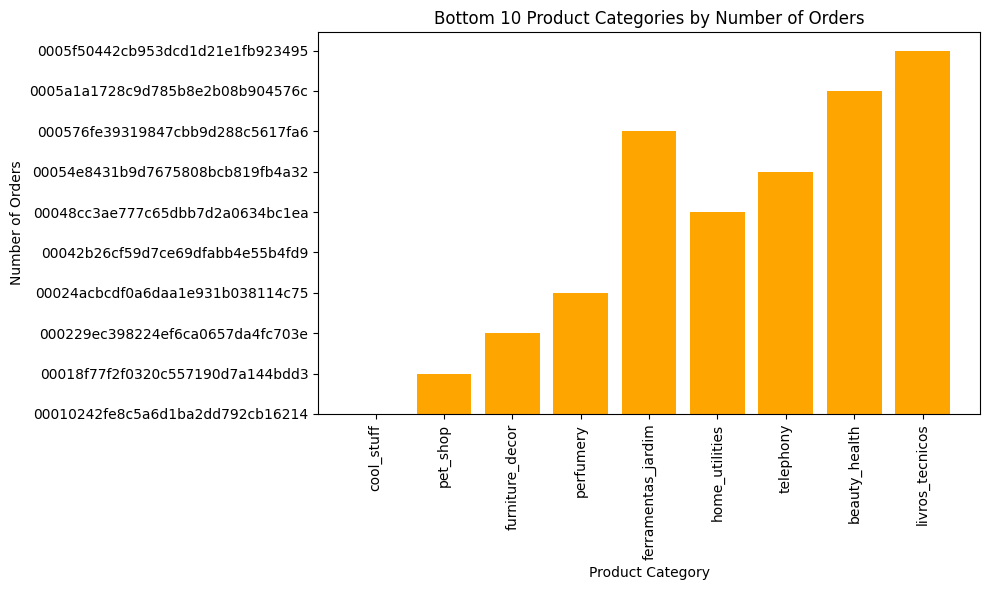

In [116]:
## **************dont like this
import matplotlib.pyplot as plt

# Finding underperforming categories: the bottom 10 in terms of total sales, number of orders, and AOV

# Bottom 10 by total sales
bottom_10_sales = cleaned_df.sort_values(by='payment_value').head(10)

# Bottom 10 by number of orders
bottom_10_orders = cleaned_df.sort_values(by='order_id').head(10)

# Plotting the bottom 10 product categories by total sales
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_sales['product_category_name'], bottom_10_sales['payment_value'], color='red')
plt.title('Bottom 10 Product Categories by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the bottom 10 product categories by number of orders
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_orders['product_category_name'], bottom_10_orders['order_id'], color='orange')
plt.title('Bottom 10 Product Categories by Number of Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [117]:
# Aggregating sales data by customer state and product category
state_category_performance = cleaned_df.groupby(['customer_state', 'product_category_name']).agg({
    'payment_value': 'sum',  # Total sales
    'order_id': 'count'      # Number of orders
}).reset_index()

# Sorting the result for better visualization
state_category_performance = state_category_performance.sort_values(by='payment_value', ascending=False)


In [118]:
print(state_category_performance)

     customer_state                           product_category_name  \
1268             SP                                  bed_bath_table   
1276             SP                           computers_accessories   
1267             SP                                   beauty_health   
1298             SP                                 furniture_decor   
1323             SP                                  sports_leisure   
1329             SP                                   watches_gifts   
1300             SP                                  home_utilities   
1265             SP                                      automotive   
1294             SP                              ferramentas_jardim   
1282             SP                                      cool_stuff   
923              RJ                                  bed_bath_table   
1328             SP                                            toys   
1315             SP                                office_furniture   
983   

In [119]:
product_sales = cleaned_df.groupby('product_id').agg({
    'payment_value': 'sum',   # Total revenue
    'order_item_id': 'count',  # Quantity sold (assuming each row is one item)
}).rename(columns={'payment_value': 'Total_Sales', 'order_item_id': 'Quantity_Sold'})

# Step 2: Merge with product details to get product names and categories (if available)
product_performance = pd.merge(product_sales, cleaned_df[['product_id', 'product_category_name']].drop_duplicates(), on='product_id', how='left')

# Step 3: Calculate the average price per product
product_performance['Average_Price'] = product_performance['Total_Sales'] / product_performance['Quantity_Sold']

# Step 4: Rank products by Total Sales and Quantity Sold
product_performance['Sales_Rank'] = product_performance['Total_Sales'].rank(ascending=False)
product_performance['Quantity_Rank'] = product_performance['Quantity_Sold'].rank(ascending=False)

# Step 5: Group by product category to analyze category performance
category_performance = product_performance.groupby('product_category_name').agg({
    'Total_Sales': 'sum',
    'Quantity_Sold': 'sum'
}).sort_values(by='Total_Sales', ascending=False)

# Display the top 10 performing products and categories
top_products = product_performance.sort_values(by='Total_Sales', ascending=False).head(10)
top_categories = category_performance.head(10)

top_products, top_categories

(                             product_id  Total_Sales  Quantity_Sold  \
 11352  5769ef0a239114ac3a854af00df129e4    109312.64              8   
 24086  bb50f2e236e5eea0100680137654686c     81887.42            209   
 8613   422879e10f46682990de24d770e7f83d     79512.22            505   
 27039  d1c427060a0f73f6b889a5c7c61f2ac4     70557.90            357   
 14068  6cdd53843498f92890544667809f1595     64825.67            159   
 27544  d5991653e037ccb7af6ed7d94246b249     64143.26            106   
 22112  aca2eb7d00ea1a7b8ebd4e68314663af     63788.12            536   
 21302  a62e25e09e05e6faf31d90c6ec1aa3d1     63167.37            228   
 19742  99a4788cb24856965c36a24e339b6058     63161.40            525   
 8051   3dd2a17168ec895c781a9191c1e95ad7     58962.14            278   
 
        product_category_name  Average_Price  Sales_Rank  Quantity_Rank  
 11352        landline_phones   13664.080000         1.0         2591.0  
 24086          beauty_health     391.805837         2.0  

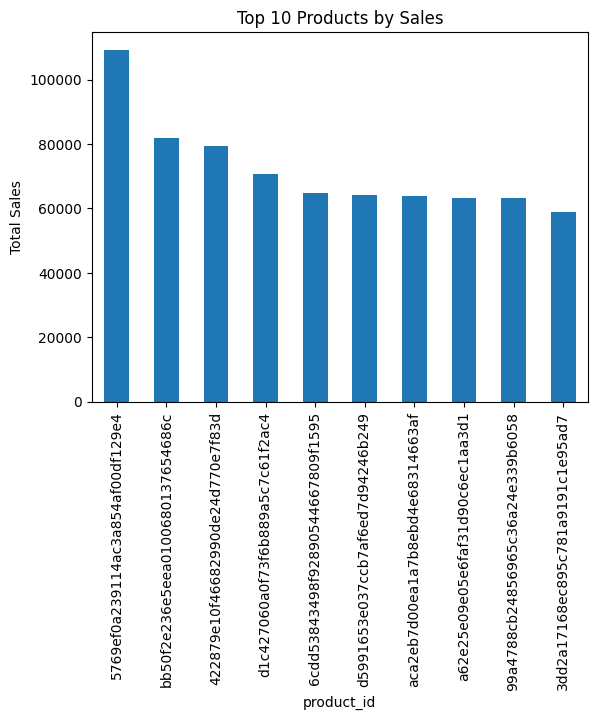

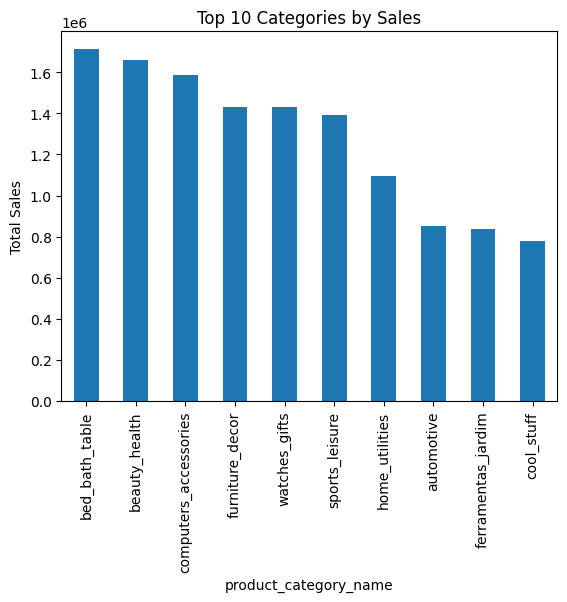

In [120]:
# Plot top 10 products by sales
top_products.plot(x='product_id', y='Total_Sales', kind='bar', title='Top 10 Products by Sales', legend=False)
plt.ylabel('Total Sales')
plt.show()

# Plot top 10 categories by sales
top_categories.plot(y='Total_Sales', kind='bar', title='Top 10 Categories by Sales', legend=False)
plt.ylabel('Total Sales')
plt.show()

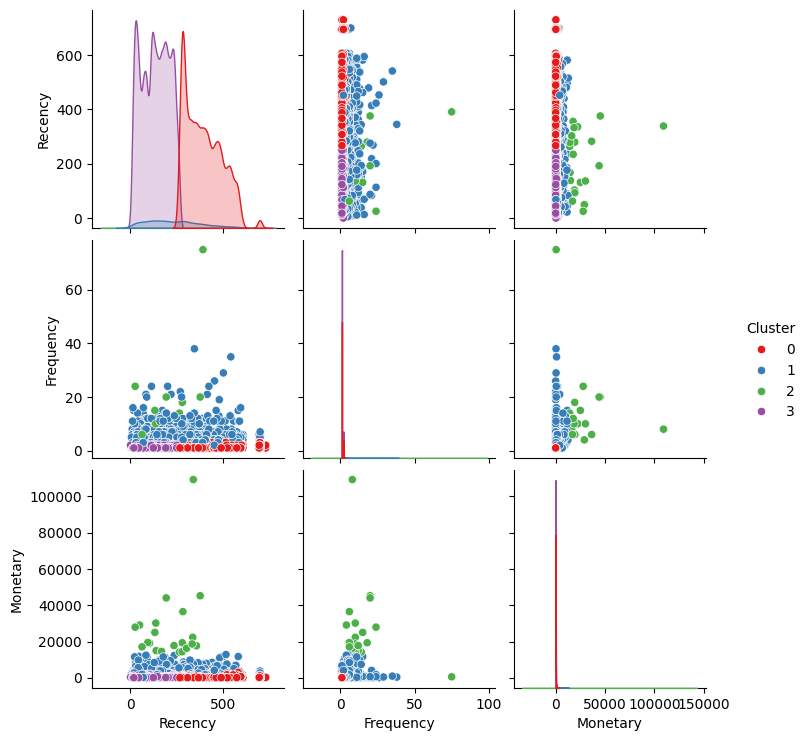

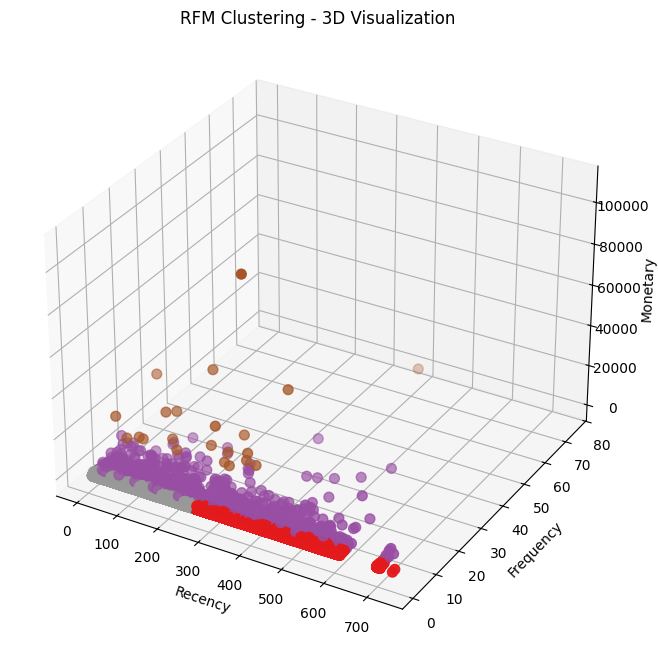

In [121]:


# Step 1: Calculate RFM metrics
# Convert the 'order_purchase_timestamp' to datetime
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

# Set the analysis date as the day after the last purchase
analysis_date = cleaned_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by customer and calculate Recency, Frequency, and Monetary values
rfm_df = cleaned_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency (number of orders)
    'payment_value': 'sum'  # Monetary (total spend)
})

# Rename columns
rfm_df.rename(columns={'order_purchase_timestamp': 'Recency', 'order_id': 'Frequency', 'payment_value': 'Monetary'}, inplace=True)

# Step 2: Normalize RFM values (Standard Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Convert the scaled values back to a DataFrame for easier interpretation
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm_df.index)



# Set the number of clusters (k) - you can adjust this value based on your dataset
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)



# Use seaborn pairplot to visualize the clusters in 2D space
sns.pairplot(rfm_df, hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()

# Optional: Plot each RFM dimension in 3D for better understanding
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each customer with Recency, Frequency, and Monetary values in 3D
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster'], cmap='Set1', s=50)

# Label axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM Clustering - 3D Visualization')
plt.show()


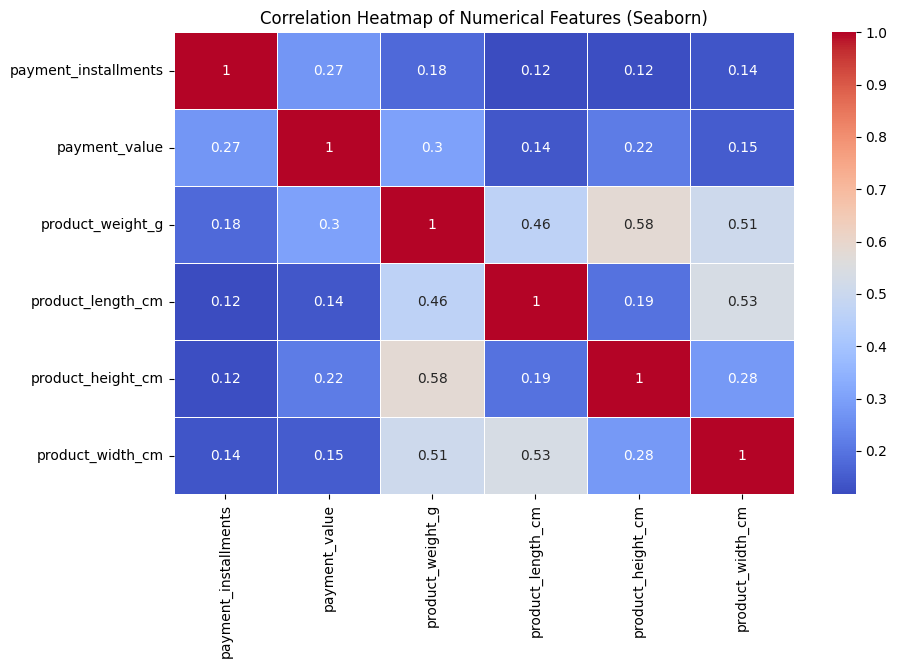

In [134]:
numerical_columns_latest = ['payment_installments', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

corr_matrix_latest = cleaned_df[numerical_columns_latest].corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_latest, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Seaborn)')
plt.show()

# Based on the heatmap graph, we can identify the moderate correlation between size of the product(both length and width) 
# and the weight of the product. Hence, we may be able to utilize in both shipping production and inventory management 


In [123]:
# RFM Analysis
rfm = cleaned_df.groupby('customer_id').agg({
    'order_id': 'count',               # Frequency
    'order_purchase_timestamp': 'max',  # Recency
    'payment_value': 'sum'              # Monetary value
}).reset_index()

# Convert recency to days
import datetime as dt
rfm['recency'] = (dt.datetime.now() - pd.to_datetime(rfm['order_purchase_timestamp'])).dt.days

# Drop the 'order_purchase_timestamp' column
rfm = rfm.drop('order_purchase_timestamp', axis=1)

# Rename columns
rfm.columns = ['customer_id', 'frequency', 'recency', 'monetary']

# Display RFM metrics
print(rfm.head())


                        customer_id  frequency  recency  monetary
0  00012a2ce6f8dcda20d059ce98491703          1   114.74      2510
1  000161a058600d5901f007fab4c27140          1    67.41      2632
2  0001fd6190edaaf884bcaf3d49edf079          1   195.42      2770
3  0002414f95344307404f0ace7a26f1d5          1   179.35      2600
4  000379cdec625522490c315e70c7a9fb          1   107.01      2371


In [124]:
# Define churn threshold (e.g., customers who haven't purchased in the last 180 days)
churn_threshold = 180
rfm['churn'] = rfm['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

# Display churn prediction results
print(rfm[['customer_id', 'recency', 'churn']].head())


                        customer_id  recency  churn
0  00012a2ce6f8dcda20d059ce98491703   114.74      0
1  000161a058600d5901f007fab4c27140    67.41      0
2  0001fd6190edaaf884bcaf3d49edf079   195.42      1
3  0002414f95344307404f0ace7a26f1d5   179.35      0
4  000379cdec625522490c315e70c7a9fb   107.01      0


In [125]:
# Group by customer state and product category to analyze biases
state_product_analysis = cleaned_df.groupby(['customer_state', 'product_category_name'])['order_id'].count().unstack()

# Display the analysis
print(state_product_analysis)


product_category_name  agro_industria_e_comercio  alimentos  artes  \
customer_state                                                       
AC                                           NaN        NaN    NaN   
AL                                           1.0        1.0    NaN   
AM                                           NaN        1.0    1.0   
AP                                           1.0        NaN    2.0   
BA                                           5.0       18.0   10.0   
CE                                           6.0        5.0    NaN   
DF                                           NaN        9.0    6.0   
ES                                           2.0       14.0    1.0   
GO                                           7.0        7.0    4.0   
MA                                           1.0        NaN    NaN   
MG                                          22.0       39.0   19.0   
MS                                           3.0        4.0    1.0   
MT                  

Based on the product analysis per state, we can determine the followings.

Top product categories by state:
- BA: The top categories are following automotive, beauty_health, sports_leisure, and watches_gifts. This indicates a strong consumer interest in these categories.
- AL: The top categories are following beauty_health and telephony, showing a focus on personal care and communication products.
- AM: The top categories are following beauty_health, sports_leisure, and automotive, suggesting a balanced interest in health, fitness, and vehicle-related products.

We may be able to utilize these data to create marketing campaign.

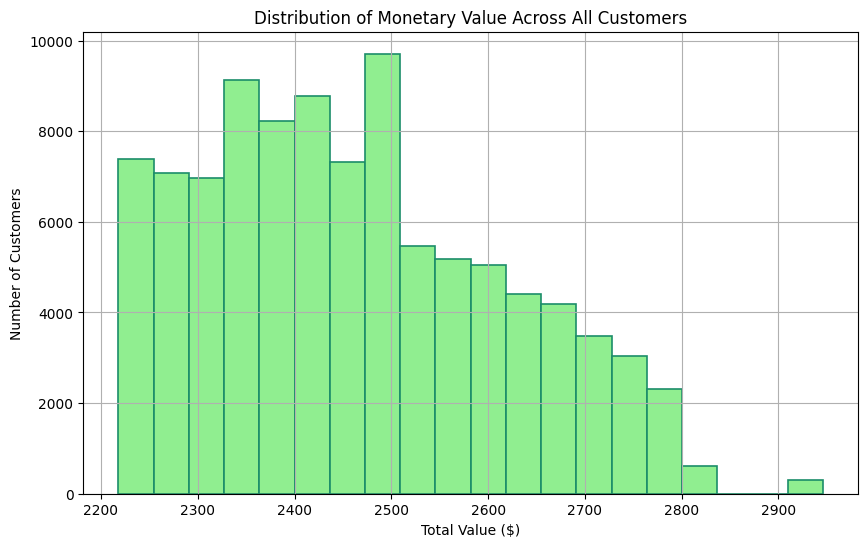

In [126]:
# Distribution plot (histogram) of monetary values for all customers
plt.figure(figsize=(10, 6))
rfm['monetary'].hist(bins=20, color='lightgreen', edgecolor='#1B8D69', linewidth=1.2)

plt.title('Distribution of Monetary Value Across All Customers')
plt.ylabel('Number of Customers')
plt.xlabel('Total Value ($)')
plt.show()


In [127]:
# Define churn threshold (e.g., customers who haven't purchased in the last 180 days)
churn_threshold = 180
rfm['churn'] = rfm['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

# Display churn prediction results
print(rfm[['customer_id', 'recency', 'churn']].head())


                        customer_id  recency  churn
0  00012a2ce6f8dcda20d059ce98491703   114.74      0
1  000161a058600d5901f007fab4c27140    67.41      0
2  0001fd6190edaaf884bcaf3d49edf079   195.42      1
3  0002414f95344307404f0ace7a26f1d5   179.35      0
4  000379cdec625522490c315e70c7a9fb   107.01      0


Overall Churn Rate: 28.05%


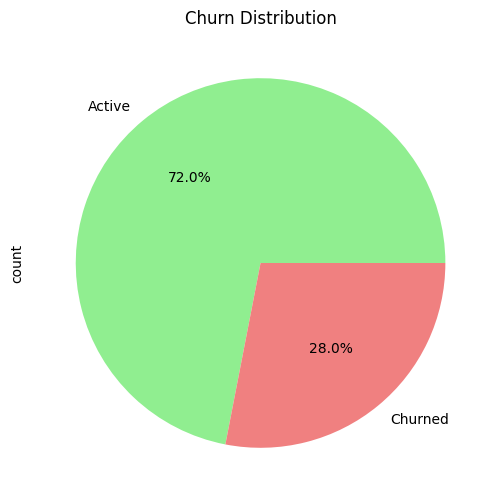

In [128]:
# Calculate the percentage of churned customers
churn_rate = rfm['churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Visualize churn distribution
plt.figure(figsize=(6, 6))
rfm['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], labels=['Active', 'Churned'])
plt.title('Churn Distribution')
plt.show()


segment
Low          28.354961
Medium       27.990256
High         28.252954
Very High    27.594368
Name: churn, dtype: float64


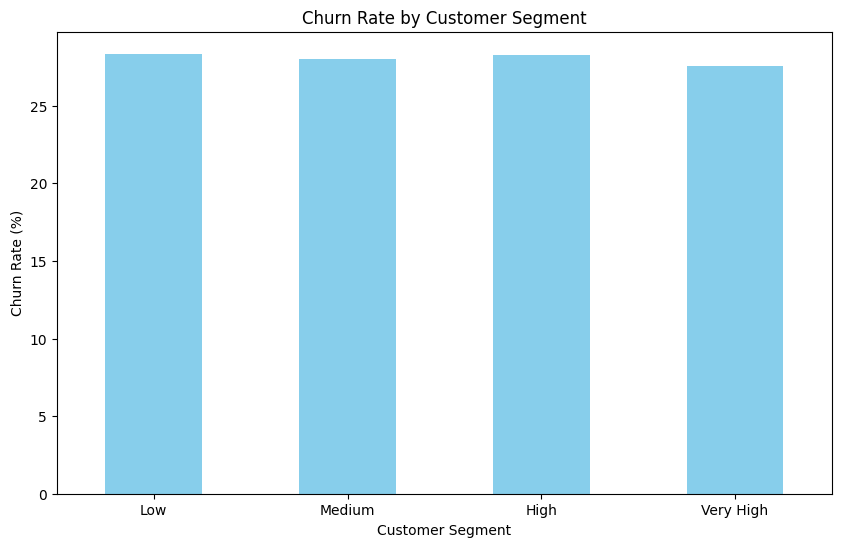

In [129]:
# Create customer segments based on monetary value (low, medium, high, very high)
rfm['segment'] = pd.qcut(rfm['monetary'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze churn by customer segment
churn_by_segment = rfm.groupby('segment')['churn'].mean() * 100
print(churn_by_segment)

# Visualize churn by customer segment
plt.figure(figsize=(10, 6))
churn_by_segment.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Customer Segment')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.show()


In [130]:
# Total number of customers
total_customers = rfm.shape[0]

# Number of churned customers
churned_customers = rfm['churn'].sum()

# Number of active customers
active_customers = total_customers - churned_customers

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Active Customers: {active_customers}")


Total Customers: 98665
Churned Customers: 27675
Active Customers: 70990


In [131]:
# Number of customers per segment
customers_by_segment = rfm.groupby('segment')['customer_id'].count()

# Number of churned customers per segment
churned_by_segment = rfm[rfm['churn'] == 1].groupby('segment')['customer_id'].count()

# Print results
print("Customers by Segment:")
print(customers_by_segment)

print("\nChurned Customers by Segment:")
print(churned_by_segment)


Customers by Segment:
segment
Low          24814
Medium       24630
High         24716
Very High    24505
Name: customer_id, dtype: int64

Churned Customers by Segment:
segment
Low          7036
Medium       6894
High         6983
Very High    6762
Name: customer_id, dtype: int64


In [132]:
# Total revenue by segment
revenue_by_segment = rfm.groupby('segment')['monetary'].sum()

# Print results
print("Revenue by Segment:")
print(revenue_by_segment)


Revenue by Segment:
segment
Low          56604336
Medium       58907838
High         61874095
Very High    65618158
Name: monetary, dtype: int64


In [133]:
# Revenue from churned customers
revenue_lost = rfm[rfm['churn'] == 1]['monetary'].sum()

# Print revenue lost
print(f"Total Revenue Lost Due to Churn: ${revenue_lost:.2f}")


Total Revenue Lost Due to Churn: $68141521.00
